# Modeling (Exploration)

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [6]:
df_bronz = pd.read_csv('../data/bronze/train.csv')

## preprocess dataset

In [18]:
df_silver = df_bronz.drop(columns=['description','uid'])

In [21]:
city_dum = pd.get_dummies(df_bronz['city'], prefix='city')
hometype_dum = pd.get_dummies(df_bronz['homeType'], prefix='home_')

In [23]:
df_silver = df_silver.join(city_dum).join(hometype_dum).drop(columns=['city','homeType'])

## Exploratory model

In [28]:
X = df_silver.drop(columns=['priceRange'])
y = df_silver['priceRange']

In [29]:

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [32]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)


In [35]:
feature_names = X.columns

### Feature importance based on mean decrease in impurity

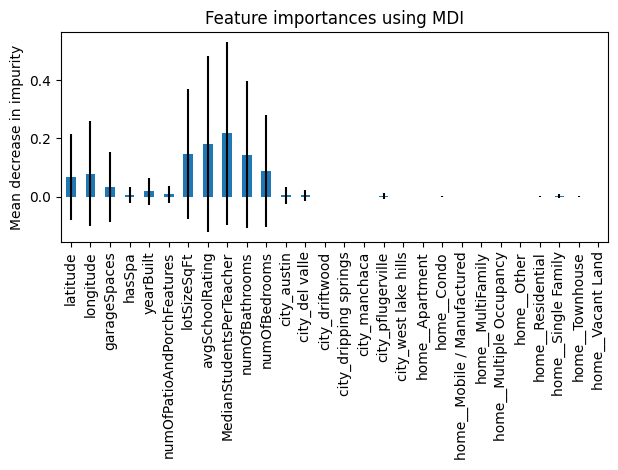

In [38]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [39]:
clf.score(X,y)

0.4233

%md
## Conclusions
* the variables city_* and home_* aren't important for the classification (Hypotesis acepted)
* the most important variables are related with school, bathrooms and bedrooms, size, geograpical locatiob
* The exploratory model got bad metrics (score), models based on boosting or baggin are recommend